
# **Capstone Project**

The project created involves the use of deep learning techniques, such as pre-trained transfer learning models and neural networks to train a more precise computer-vision model that can detect the emotion on a person’s face and classify it into four kinds i.e. happy, sad, neutral and surprised. Additionally, the metrics of the different models would be compared and contrasted to find the best one.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

We have built two Convolutional Neural Network architectures in Milestone 1. Here, we will further try to achieve better performance by increasing the number of parameters/weights. Therefore, we will start this Milestone with three popular Transfer Learning architectures, namely, VGG16, ResNet v2, and Efficient Net. Please feel free to explore other pre-trained models as well. Link to Keras documentation for pre-trained models - https://keras.io/api/applications/

**Note:** We will mount our drive and import our dataset once again for Milestone 2.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is not a library that can be downloaded locally on your device.**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [3]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/DL Project Data/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
picture_size = 48
folder_path = "/content/Facial_emotion_images/"

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. Unlike in Milestone 1, we will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [6]:
import tensorflow as tf


batch_size  = 32
img_size = 48


train_set = tf.keras.utils.image_dataset_from_directory(directory = folder_path + "train",          
                                              image_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True)



validation_set =  tf.keras.utils.image_dataset_from_directory(directory = folder_path + "validation",
                                              image_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True) # Write your code here



test_set =   tf.keras.utils.image_dataset_from_directory(directory = folder_path + "test",
                                              image_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True)# Write your code here

Found 15109 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [8]:

transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


epochs = 20

In [10]:
vggmodel.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy']) # Write your code to compile the vggmodel. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'. 

In [11]:
history_vgg = vggmodel.fit(train_set, validation_data = validation_set, batch_size=batch_size,
    epochs=epochs,
    callbacks=reduce_learningrate) # Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train the model for 20 epochs.


Epoch 1/20
473/473 [==============================] - 15s 10ms/step - loss: 1.2712 - accuracy: 0.4446 - val_loss: 1.0979 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - 4s 9ms/step - loss: 1.1131 - accuracy: 0.5157 - val_loss: 1.1200 - val_accuracy: 0.5051 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - 4s 9ms/step - loss: 1.0664 - accuracy: 0.5427 - val_loss: 1.0699 - val_accuracy: 0.5471 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - 4s 9ms/step - loss: 1.0203 - accuracy: 0.5663 - val_loss: 1.0701 - val_accuracy: 0.5523 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - 4s 9ms/step - loss: 0.9739 - accuracy: 0.5916 - val_loss: 1.0713 - val_accuracy: 0.5558 - lr: 0.0010
Epoch 6/20
465/473 [============================>.] - ETA: 0s - loss: 0.9218 - accuracy: 0.6120
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 4s 9ms/

### **Plotting the accuracies of the VGG16 model**

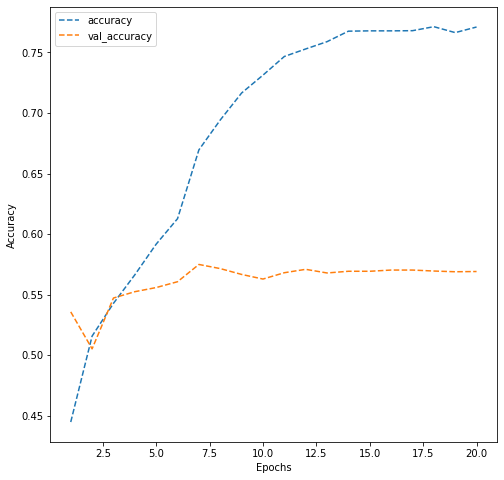

In [12]:
# Plotting the accuracies

mod_hist = history_vgg.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, mod_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, mod_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the VGG16 model**

In [13]:
test_predv = vggmodel.evaluate(test_set)
print('Test Loss:', test_predv[0])
print('Test accuracy:', test_predv[1])

# Write your code to evaluate model performance on the test set

4/4 [==============================] - 0s 6ms/step - loss: 1.3567 - accuracy: 0.5625
Test Loss: 1.3566842079162598
Test accuracy: 0.5625


**Observations and Insights: According to the VGG 16 model with reduced learning rate, the trainig  and validation accuracies of the model are improving steadily for the first 3 epochs. After the 3rd epoch, the training accuracy continues to rise sharply where as the validation accuracy fluctuates around 55 to 60%. The plot shows that there is overfitting as the training and validation accuracies are significantly different after training. This is also indicated by the high test loss of around 1.357.**

## **ResNet V2 Model**

In [14]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [15]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False


# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          ) # Write your code here. You may play around with the hyperparameters if you wish.


reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001) # Write your code here. You may play around with the hyperparameters if you wish.

epochs = 20

In [17]:
resnetmodel.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])# Write your code to compile your resnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 

In [18]:
history_resnet = resnetmodel.fit(train_set, validation_data = validation_set, epochs = 20, batch_size = 32, callbacks=reduce_learningrate) # Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.


Epoch 1/20
473/473 [==============================] - 20s 30ms/step - loss: 1.2690 - accuracy: 0.4362 - val_loss: 1.0511 - val_accuracy: 0.5596 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - 12s 25ms/step - loss: 1.1046 - accuracy: 0.5237 - val_loss: 1.1213 - val_accuracy: 0.5194 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - 12s 25ms/step - loss: 1.0409 - accuracy: 0.5575 - val_loss: 1.0182 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - 12s 25ms/step - loss: 0.9906 - accuracy: 0.5850 - val_loss: 1.0478 - val_accuracy: 0.5610 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - 12s 25ms/step - loss: 0.9586 - accuracy: 0.5973 - val_loss: 1.0028 - val_accuracy: 0.5823 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - 12s 25ms/step - loss: 0.9224 - accuracy: 0.6131 - val_loss: 1.0116 - val_accuracy: 0.5980 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - 12s 

## **Plotting the accuracies of the ResNet Model**

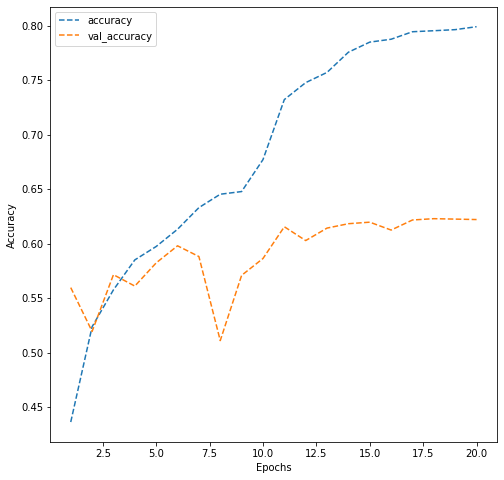

In [19]:
mod_hist = history_resnet.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, mod_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, mod_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the ResNet Model**

In [20]:
test_predr = resnetmodel.evaluate(test_set)
print('Test Loss:', test_predr[0])
print('Test accuracy:', test_predr[1]) # Write your code to evaluate model performance on the test set

4/4 [==============================] - 0s 17ms/step - loss: 1.0457 - accuracy: 0.6016
Test Loss: 1.0457055568695068
Test accuracy: 0.6015625


**Observations and Insights: According to the ResNet model with reduced learning rate, the validation accuracies of the model rises to around 60% for the first 6 epochs, drops for the next two epochs 20 epochs and then rises to slightly above 60%, while the training accuracy continues to steadily rise till the 20th epoch. The plot shows that there is overfitting after 3 epochs as the trend of the training and validation accuracies start diverging as the model is being trained.**

## **EfficientNet Model**

In [21]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [24]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation = 'softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          ) # Write your code here. You may play around with the hyperparameters if you wish.


reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)  # Write your code here. You may play around with the hyperparameters if you wish.

epochs = 20

In [25]:
Efficientnetmodel.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])# Write your code to compile your Efficientnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.

In [26]:
history_enet = Efficientnetmodel.fit(train_set, validation_data = validation_set, epochs = 20, batch_size = 32, callbacks = reduce_learningrate)# Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

Epoch 1/20
473/473 [==============================] - 19s 26ms/step - loss: 1.2511 - accuracy: 0.4391 - val_loss: 1.1119 - val_accuracy: 0.5218 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - 10s 22ms/step - loss: 1.0466 - accuracy: 0.5515 - val_loss: 1.3582 - val_accuracy: 0.4093 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - 11s 22ms/step - loss: 0.9879 - accuracy: 0.5851 - val_loss: 0.9839 - val_accuracy: 0.5986 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - 11s 23ms/step - loss: 0.9489 - accuracy: 0.6027 - val_loss: 0.9063 - val_accuracy: 0.6337 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - 11s 23ms/step - loss: 0.9215 - accuracy: 0.6133 - val_loss: 1.0097 - val_accuracy: 0.5855 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - 11s 23ms/step - loss: 0.8866 - accuracy: 0.6340 - val_loss: 0.9022 - val_accuracy: 0.6197 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - 11s 

## **Plotting the accuracies of the EfficientNet Model**

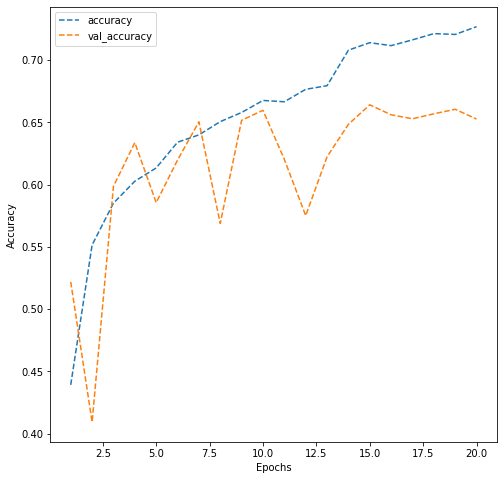

In [27]:
mod_hist = history_enet.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, mod_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, mod_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the EfficientnetNet Model**

In [28]:
test_prede = Efficientnetmodel.evaluate(test_set)
print('Test Loss:', test_prede[0])
print('Test accuracy:', test_prede[1]) # Write your code to evaluate the model performance on the test set

4/4 [==============================] - 0s 13ms/step - loss: 0.8125 - accuracy: 0.6484
Test Loss: 0.812530517578125
Test accuracy: 0.6484375


**Observations and Insights: According to this EfficientNet model with the reduced learning rate, the validation accuracies of the model rises from 2.5 to 5 epochs and then fluctuates vigorosly between 55 to 65% accuracy till 20 epochs, while the training accuracy steeply rises till the 5th epoch and then continues to rise at a lower rate till the 20th epoch. The plot shows that there is overfitting after 7.5 epochs as the training and validation accuracies have different trends.**

**Transfer Learning Observations:**

* It seems that the pre-trained models we have implemented seem are overfitting as the training and validation accuracies do not learn at the same rate. 

* Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [29]:
import tensorflow as tf


batch_size  = 32
img_size = 48


train_set = tf.keras.utils.image_dataset_from_directory(directory = folder_path + "train",          
                                              image_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True)



validation_set =  tf.keras.utils.image_dataset_from_directory(directory = folder_path + "validation",
                                              image_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True) # Write your code here



test_set =   tf.keras.utils.image_dataset_from_directory(directory = folder_path + "test",
                                              image_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True)# Write your code here

Found 15109 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [30]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(filters=64, kernel_size=(2,2), padding="same", activation = 'relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation = 'relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation = 'relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation = 'relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 5th CNN Block
model3.add(Conv2D(filters=64, kernel_size=(2,2), padding="same", activation = 'relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(512, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(no_of_classes, activation = 'softmax'))

### **Compiling and Training the Model**

In [31]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

#steps_per_epoch = train_set.n//train_set.batch_size
#validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')


In [32]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.003)
model3.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy']) # Write your code to compile your model3. Use categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.

In [34]:
history_model3 = model3.fit(train_set, validation_data = validation_set, epochs = 35, callbacks = reduce_lr)# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train your model for 35 epochs.

Epoch 1/35
473/473 [==============================] - 8s 12ms/step - loss: 1.5711 - accuracy: 0.3000 - val_loss: 1.4456 - val_accuracy: 0.2668 - lr: 0.0030
Epoch 2/35
473/473 [==============================] - 5s 11ms/step - loss: 1.3241 - accuracy: 0.3714 - val_loss: 1.2914 - val_accuracy: 0.4213 - lr: 0.0030
Epoch 3/35
473/473 [==============================] - 5s 11ms/step - loss: 1.0965 - accuracy: 0.5157 - val_loss: 1.3632 - val_accuracy: 0.4690 - lr: 0.0030
Epoch 4/35
473/473 [==============================] - 5s 11ms/step - loss: 0.9799 - accuracy: 0.5798 - val_loss: 1.1064 - val_accuracy: 0.5122 - lr: 0.0030
Epoch 5/35
473/473 [==============================] - 5s 11ms/step - loss: 0.9093 - accuracy: 0.6236 - val_loss: 0.8103 - val_accuracy: 0.6596 - lr: 0.0030
Epoch 6/35
473/473 [==============================] - 5s 11ms/step - loss: 0.8534 - accuracy: 0.6445 - val_loss: 1.0859 - val_accuracy: 0.5178 - lr: 0.0030
Epoch 7/35
473/473 [==============================] - 5s 11ms/st

## **Plotting the accuracies of the CNN**

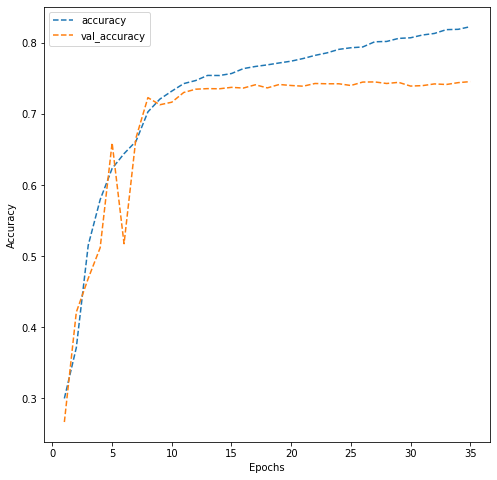

In [35]:
mod_hist = history_model3.history

list_ep = [i for i in range(1, 36)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, mod_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, mod_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the Model on Test Set**

In [36]:
test_predc = model3.evaluate(test_set)
print('Test Loss:', test_predc[0])
print('Test accuracy:', test_predc[1]) # Write your code to evaluate the model performance on the test set

4/4 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.7109
Test Loss: 0.6883417367935181
Test accuracy: 0.7109375


**Observations and Insights: According to the designed CNN model, the training and validation accuracies seem to learn at the same rate till the 10th epoch but their trends diverge until the 35th epoch, albeit the divergence is very little as the difference between the validation and training accuracies is very little after 35 epochs. Additionally, the test accuracy of the model has improved as compared to our transfer learning architectures and the test loss is also far lesser indicating that there are fewer bad predictions.**

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 files belonging to 4 classes.
1/1 [==============================] - 0s 205ms/step
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.80      0.57      0.67         7
           2       0.78      0.78      0.78         9
           3       1.00      0.75      0.86         4

    accuracy                           0.78        32
   macro avg       0.83      0.75      0.78        32
weighted avg       0.79      0.78      0.78        32



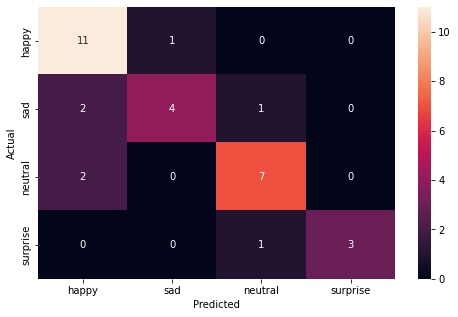

In [37]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf

test_set =  tf.keras.utils.image_dataset_from_directory(directory = folder_path + "test",
                                              image_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              shuffle = True)

data_iterator = test_set.as_numpy_iterator()
test_images,test_labels = data_iterator.next()

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights: The classification report shows that the precision values are high for all emotions which shows that the CNN model correctly classifies the images. However, the low recall value for the sad class of images indicates that the model cannot correctly classify many sad images. The recall values of the other 3 emotions is quite high. Additionally, the confusion matrix indicates the percentage of instances where the actual emotion on the image is classified as the correct/incorrect one. For example, the numbers are high on the diagonal of the matrix especially for happy and neutral. Additionally, 2% of sad and neutral pictures on the test data are predicted as happy as seen in the confusion matrix.**

## **Comparing and visualizing test losses and accuracies of the different models**

In [40]:
d=([[test_predv[0],test_predv[1]],[test_predr[0],test_predr[1]],[test_prede[0],test_prede[1]],[test_predc[0],test_predc[1]]])

header = ['Loss','Accuracy']

test_df = pd.DataFrame(d,
                  index=['VGG16','ResNet','EfficientNet','CNN'],
                  columns=header)
test_df

,Loss,Accuracy
VGG16,1.356684,0.562500
ResNet,1.045706,0.601562
EfficientNet,0.812531,0.648438
CNN,0.688342,0.710938


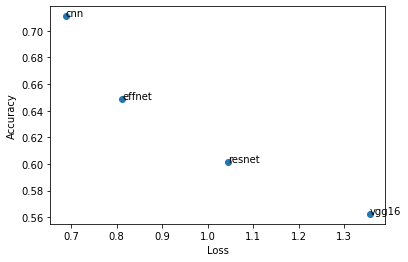

In [42]:
import matplotlib.pyplot as plt
# data
X = test_df['Loss']
Y = test_df['Accuracy']

# plot the scatter plot
plt.scatter(X,Y)

# add the axes labels to the plot
plt.xlabel('Loss')
plt.ylabel('Accuracy')

#adding text to the plot

plt.text(1.356684,	0.562500,"vgg16")
plt.text(1.045706,	0.601562,"resnet")
plt.text(0.812531,	0.648438,"effnet")
plt.text(0.688342,	0.710938,"cnn")

# display the plot
plt.show()

### **Insights**

### **Refined insights**:
- The learning trends of the validation and training accuracies tell us a lot about the model, in particular the lesser the absolute value of the difference between the training and validation accuracies, the better fit the model has.

### **Comparison of various techniques and their relative performance**:
- The designed CNN with many layers seems to perform the best as shown by the high test accuracy and simultaneously low test loss. Adding more layers to the could build better models as shown by the Resnet model. Using other in built models such as vgg 19 with convolutional layers could also be helpful. In addition to this, reducing the learning rate of the models improves their performance significantly by reducing overfitting and test loss while improving test accuracy. 

### **Proposal for the final solution design**:
- The CNN would be the best model for this computer vision model.  